In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data        = mat_content[ 'X' ]
face_data_labels = mat_content[ 'l' ]

print( 'Face Data {}'.format( face_data.shape ) )
print( 'Face Label {}'.format( face_data_labels.shape ) )

Face Data (2576, 520)
Face Label (1, 520)


# Create a train test split

In [62]:
train_set, test_set, train_label, test_label = train_test_split( face_data.T, face_data_labels.T, test_size = 0.2,
                                                                random_state = 30 )

train_set   = train_set.T.astype('float64')
test_set    = test_set.T.astype('float64')
train_label = train_label.T 
test_label  = test_label.T

print( 'Train_Set {}'.format( train_set.shape ) )
print( 'Test_Set {}'.format( test_set.shape ) )

print( 'Train_Label {}'.format( train_label.shape ) )
print( 'Test_Label {}'.format( test_label.shape ) )

Train_Set (2576, 416)
Test_Set (2576, 104)
Train_Label (1, 416)
Test_Label (1, 104)


Mean Face Shape (2576,)


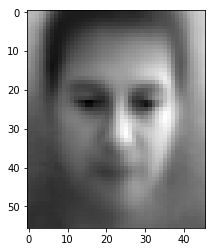

In [63]:
mean_face = np.mean( train_set, axis = 1 )

print( 'Mean Face Shape {}'.format( mean_face.shape ) )
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

In [64]:
class_indexes = { k : [] for k in range( 1, 53 ) }

for i in range( train_label.shape[ 1 ] ):
    class_indexes[ train_label.T[ i ].item() ].append( i )
    
for i in range( 1, len( class_indexes ) + 1 ):
    print( i, class_indexes[ i ], len( class_indexes[ i ] ) )

1 [15, 82, 100, 132, 139, 167, 216, 240, 319] 9
2 [40, 65, 84, 280, 330, 334, 347, 386, 401] 9
3 [28, 134, 160, 191, 222, 307] 6
4 [31, 59, 161, 200, 214, 294, 333, 341] 8
5 [17, 136, 193, 233, 318, 343, 345, 391] 8
6 [29, 47, 80, 125, 154, 171, 179, 320, 344, 380] 10
7 [101, 137, 237, 238, 257, 264, 393] 7
8 [37, 55, 130, 149, 177, 236, 276, 323] 8
9 [109, 114, 156, 172, 205, 227, 273, 279, 292] 9
10 [86, 88, 94, 235, 271, 275, 371] 7
11 [11, 23, 119, 126, 190, 256, 314, 322, 352, 373] 10
12 [24, 32, 90, 117, 249, 354, 378, 398] 8
13 [105, 150, 197, 263, 268, 324] 6
14 [50, 66, 144, 204, 289, 298, 365, 410] 8
15 [53, 87, 95, 207, 267, 288, 412, 413] 8
16 [3, 13, 93, 196, 357, 379] 6
17 [218, 231, 336, 358, 381, 402] 6
18 [19, 27, 145, 182, 213, 303, 370, 390, 405] 9
19 [42, 203, 209, 335, 342, 367, 377] 7
20 [0, 140, 147, 153, 282] 5
21 [61, 67, 239, 246, 338, 349, 368] 7
22 [26, 33, 96, 146, 148, 184, 259, 351] 8
23 [6, 62, 102, 180, 185, 250, 291] 7
24 [7, 21, 45, 75, 76, 120, 124, 

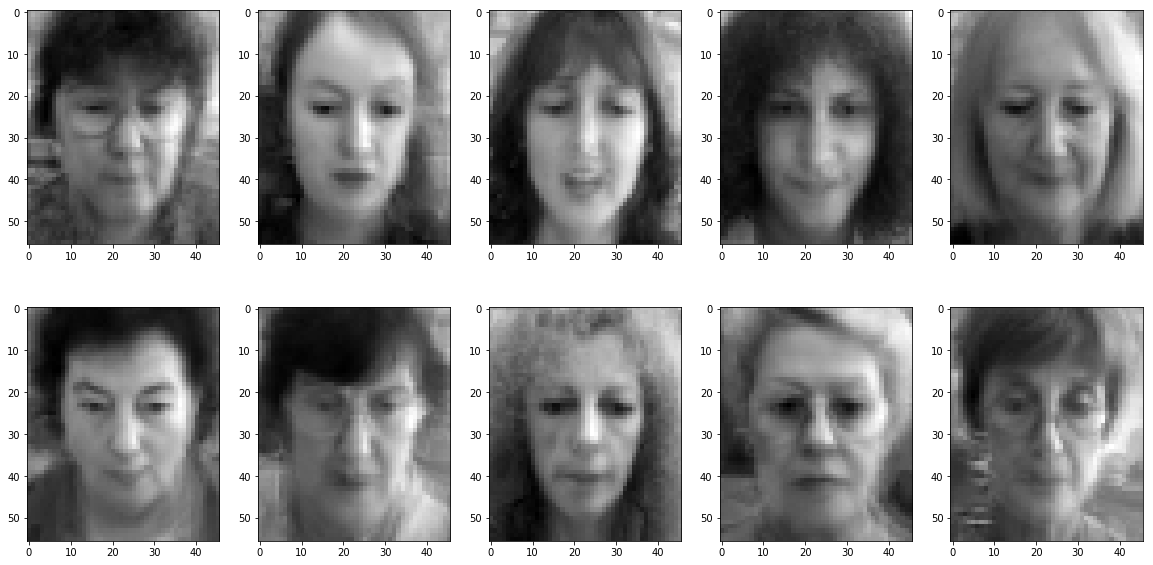

In [65]:
class_means = []

for i in range( 1, len( class_indexes ) + 1 ):
    
    temp = np.zeros( 2576 )
    
    
    for k in class_indexes[ i ]:
        temp += train_set.T[ k ]
        
    class_means.append( temp / len( class_indexes[ i ] ) )

class_means = np.asarray( class_means )

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    
    img = np.reshape( class_means[ i ], ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

Mean Face Shape (2576,)


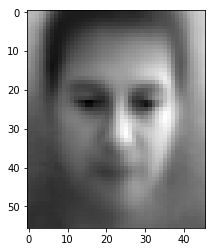

In [66]:
mean_face = np.mean( train_set, axis = 1 )

print( 'Mean Face Shape {}'.format( mean_face.shape ) )
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

# SB

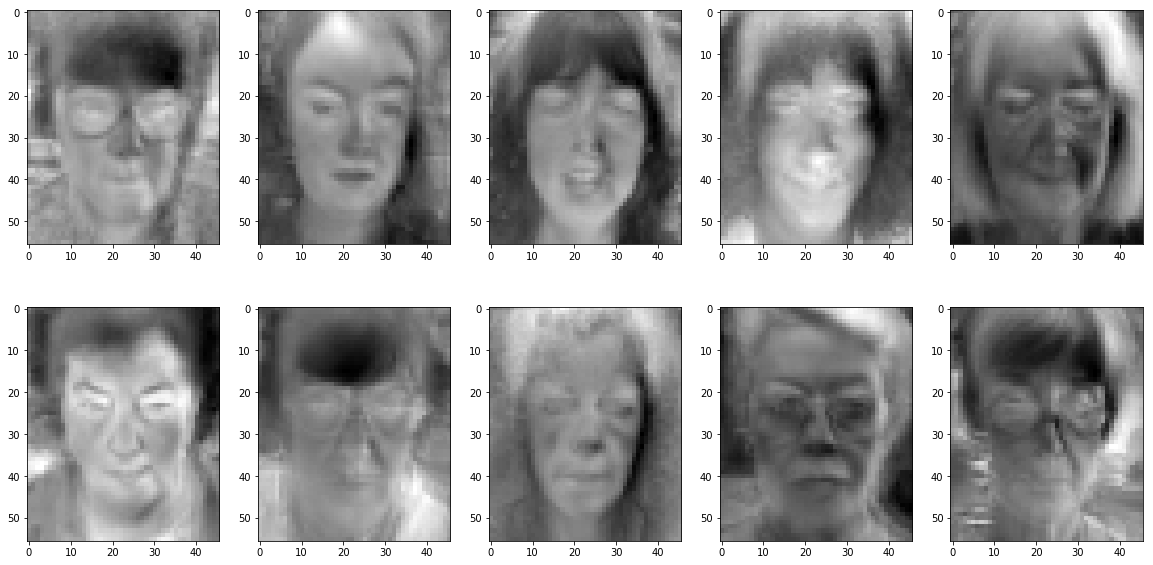

In [67]:
sub = class_means

for i in range( sub.shape[ 0 ] ):
    sub[ i ] = sub[ i ] - mean_face
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    
    img = np.reshape( sub[ i ], ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

In [68]:
class_means.shape

(52, 2576)

In [69]:
S_B = np.dot( sub.T, sub )

print( 'S_B: {}'.format( S_B.shape ) )

np.linalg.matrix_rank( S_B)

S_B: (2576, 2576)


51

# SW

In [70]:
class_scatter = []

# for i in range( 1, len( class_indexes ) + 1 ):
for i in range( 1, 2):

    class_data = []
    
    for k in range( len( class_indexes[ i ] ) ):
        class_data.append( train_set.T[ k ] )
        
    class_data = np.asarray( class_data )
    
    for l in range( len( class_data ) ):
        class_data[ l ] = class_data[ l ] - class_means[ i - 1 ]
        
    class_scatter_mat = np.dot( class_data.T, class_data )
    
    class_scatter.append( class_scatter_mat / len( class_indexes[ i ] ) )
    
class_scatter = np.asarray( class_scatter )

In [71]:
S_W = np.sum( class_scatter, axis = 0 )

S_W.shape

(2576, 2576)

In [72]:
np.linalg.matrix_rank( S_W )

61